In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [8]:
data = pd.read_csv('data.csv')

In [9]:
accel_df = data[['accelerometerX', 'accelerometerY', 'accelerometerZ']].copy()
accel_df.rename(columns={'accelerometerX': 'x',
                         'accelerometerY': 'y',
                         'accelerometerZ': 'z'},
                inplace=True)
accel_df['time_index'] = np.arange(accel_df.shape[0])
accel_df = pd.melt(accel_df, var_name='direction', value_name='acceleration', id_vars=['time_index'])

In [10]:
gyro_df = data[['gyroscopeX', 'gyroscopeY', 'gyroscopeZ']].copy()
gyro_df.rename(columns={'gyroscopeX': 'x',
                        'gyroscopeY': 'y',
                        'gyroscopeZ': 'z'},
               inplace=True)
gyro_df['time_index'] = np.arange(gyro_df.shape[0])
gyro_df = pd.melt(gyro_df, var_name='direction', value_name='angular_velocity', id_vars=['time_index'])

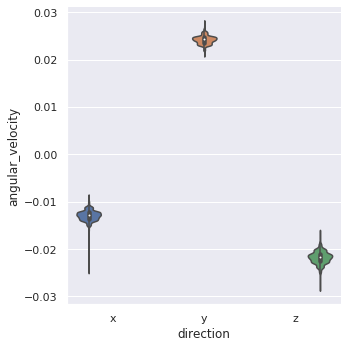

In [11]:
sns.catplot(x="direction", y="angular_velocity", hue="direction", kind='violin', data=gyro_df)

In [12]:
gyro_df.groupby('direction').mean()[['angular_velocity']]

,angular_velocity
direction,
x,-0.012881
y,0.024203
z,-0.021752


In [13]:
gyro_df.groupby('direction').std()[['angular_velocity']]

,angular_velocity
direction,
x,0.001041
y,0.000846
z,0.001315


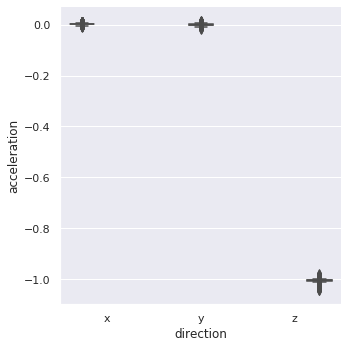

In [14]:
sns.catplot(x="direction", y="acceleration", hue="direction", kind='box', data=accel_df)

In [15]:
accel_df.groupby('direction').mean()[['acceleration']]

,acceleration
direction,
x,0.002524
y,-0.000348
z,-1.004805


In [16]:
accel_df.groupby('direction').std()[['acceleration']]

,acceleration
direction,
x,0.002873
y,0.003575
z,0.004191
